In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
y_train.shape

(60000,)

In [6]:
y_example = to_categorical(y_train)

In [7]:
y_example.shape

(60000, 10)

In [8]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [10]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [11]:
x_train = x_train/255
x_test= x_test/255

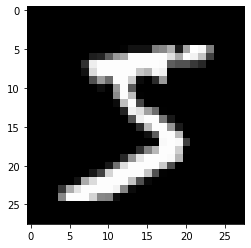

In [12]:
plt.imshow(x_train[0], cmap='gray')

In [13]:
x_train = x_train.reshape(60000,28,28,1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test = x_test.reshape(10000,28,28,1)

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Activation,Flatten,MaxPool2D

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrices=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping 

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [21]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 251us/sample - loss: 0.1391 - val_loss: 0.0573
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0481 - val_loss: 0.0537
Epoch 3/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0306 - val_loss: 0.0469
Epoch 4/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0222 - val_loss: 0.0521


In [22]:
metrics = pd.DataFrame(model.history.history)

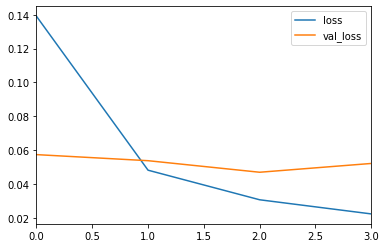

In [23]:
metrics.plot()

In [24]:
model.metrics_names

['loss']

In [25]:
model.evaluate(x_test,y_cat_test,verbose=0)

0.052061870475130854

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
predictions = model.predict_classes(x_test) 

In [28]:
y_cat_test.shape

(10000, 10)

In [29]:
y_test.shape

(10000,)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
print(confusion_matrix(y_test,predictions))

[[ 975    1    1    1    0    0    2    0    0    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   2    3 1023    1    0    0    1    2    0    0]
 [   0    0    3 1004    0    1    0    1    1    0]
 [   0    0    0    0  973    0    3    0    0    6]
 [   1    0    1   13    0  875    1    0    1    0]
 [   4    3    0    1    5    2  941    0    2    0]
 [   1    7    9    0    0    1    0 1007    1    2]
 [   8    4    8    8    6    2    2    3  928    5]
 [   2    3    1   10    7    2    0    7    0  977]]


In [33]:
import seaborn as sns

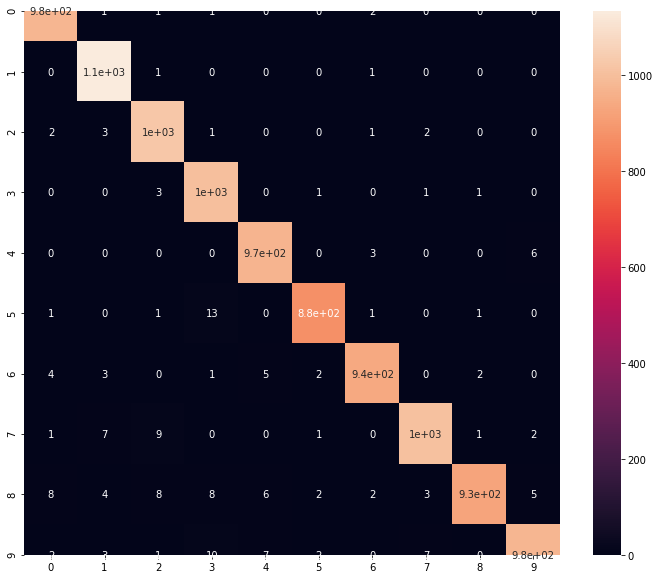

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

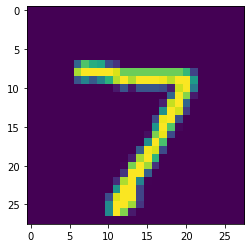

In [40]:
plt.imshow(x_test[0].reshape(28,28))

In [42]:
model.predict_classes(x_test[0].reshape(1,28,28,1))

array([7], dtype=int64)